In [135]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

In [136]:
df = pd.read_csv("data/data_smogn_05.csv")
df

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,67.0,351413.0,0.437119,0.496777,0.000,0.038004,0.621056,0.055218,0.077442,0.329562,127.922188
1,68.0,351783.0,0.427469,0.615662,0.000,0.028970,0.348779,0.178368,0.102032,0.201814,92.113026
2,68.0,351661.0,0.509178,0.543150,0.000,0.027034,0.234267,0.110648,0.084248,0.328488,114.429474
3,67.0,351394.0,0.437674,0.490773,0.000,0.038458,0.635044,0.048935,0.076265,0.335983,129.716280
4,68.0,351567.0,0.572096,0.487288,0.000,0.025623,0.153533,0.057433,0.071576,0.424923,131.394058
...,...,...,...,...,...,...,...,...,...,...,...
106364,40.0,246306.0,0.470000,0.938000,-4.722,0.105000,0.000529,0.000000,0.251000,0.453000,128.002000
106365,38.0,312566.0,0.475000,0.860000,-4.722,0.042100,0.006500,0.000002,0.246000,0.427000,113.949000
106366,21.0,384999.0,0.172000,0.235000,-16.393,0.042200,0.640000,0.928000,0.086300,0.033900,125.995000
106367,41.0,283893.0,0.587000,0.506000,-10.889,0.029700,0.381000,0.000000,0.270000,0.413000,135.960000


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106369 entries, 0 to 106368
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        106369 non-null  float64
 1   duration_ms       106369 non-null  float64
 2   danceability      106369 non-null  float64
 3   energy            106369 non-null  float64
 4   loudness          106369 non-null  float64
 5   speechiness       106369 non-null  float64
 6   acousticness      106369 non-null  float64
 7   instrumentalness  106369 non-null  float64
 8   liveness          106369 non-null  float64
 9   valence           106369 non-null  float64
 10  tempo             106369 non-null  float64
dtypes: float64(11)
memory usage: 8.9 MB


In [138]:
# df['track_genre'].unique()

In [139]:
# df['track_id'].unique()

In [140]:
# df[df['track_genre'] == 'anime']

In [141]:
# clean_df = df.drop_duplicates(subset = "track_id")
# clean_df

In [142]:
# clean_df[clean_df['explicit'] == True]
# clean_df = clean_df[clean_df["popularity"] > 4]

# clean_df

In [143]:
# def filter_outliers(df, column):
#   Q1 = df[column].quantile(0.25)
#   Q3 = df[column].quantile(0.75)
#   IQR = Q3 - Q1
#   lower_bound = Q1 - 1.5 * IQR
#   upper_bound = Q3 + 1.5 * IQR
#   return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# # Apply the outlier filtering method to each numeric column
# numeric_columns = clean_df.select_dtypes(include=['int64', 'float64']).columns.drop(['Unnamed: 0', 'popularity'])
# filtered_data = clean_df.copy()
# for column in numeric_columns:
#   clean_df = filter_outliers(filtered_data, column)
# clean_df

In [144]:
smogn_clean_df = df

In [145]:
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = smogn_clean_df.drop(['popularity'], axis=1)
y = smogn_clean_df['popularity']

# smogn_df = pd.read_csv('./data/data_smogn.csv')
# X = smogn_df.drop(['popularity'], axis=1)
# y = smogn_df['popularity']

# Convert 'explicit' from boolean to int (True to 1, False to 0)
# X['explicit'] = X['explicit'].astype(int)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

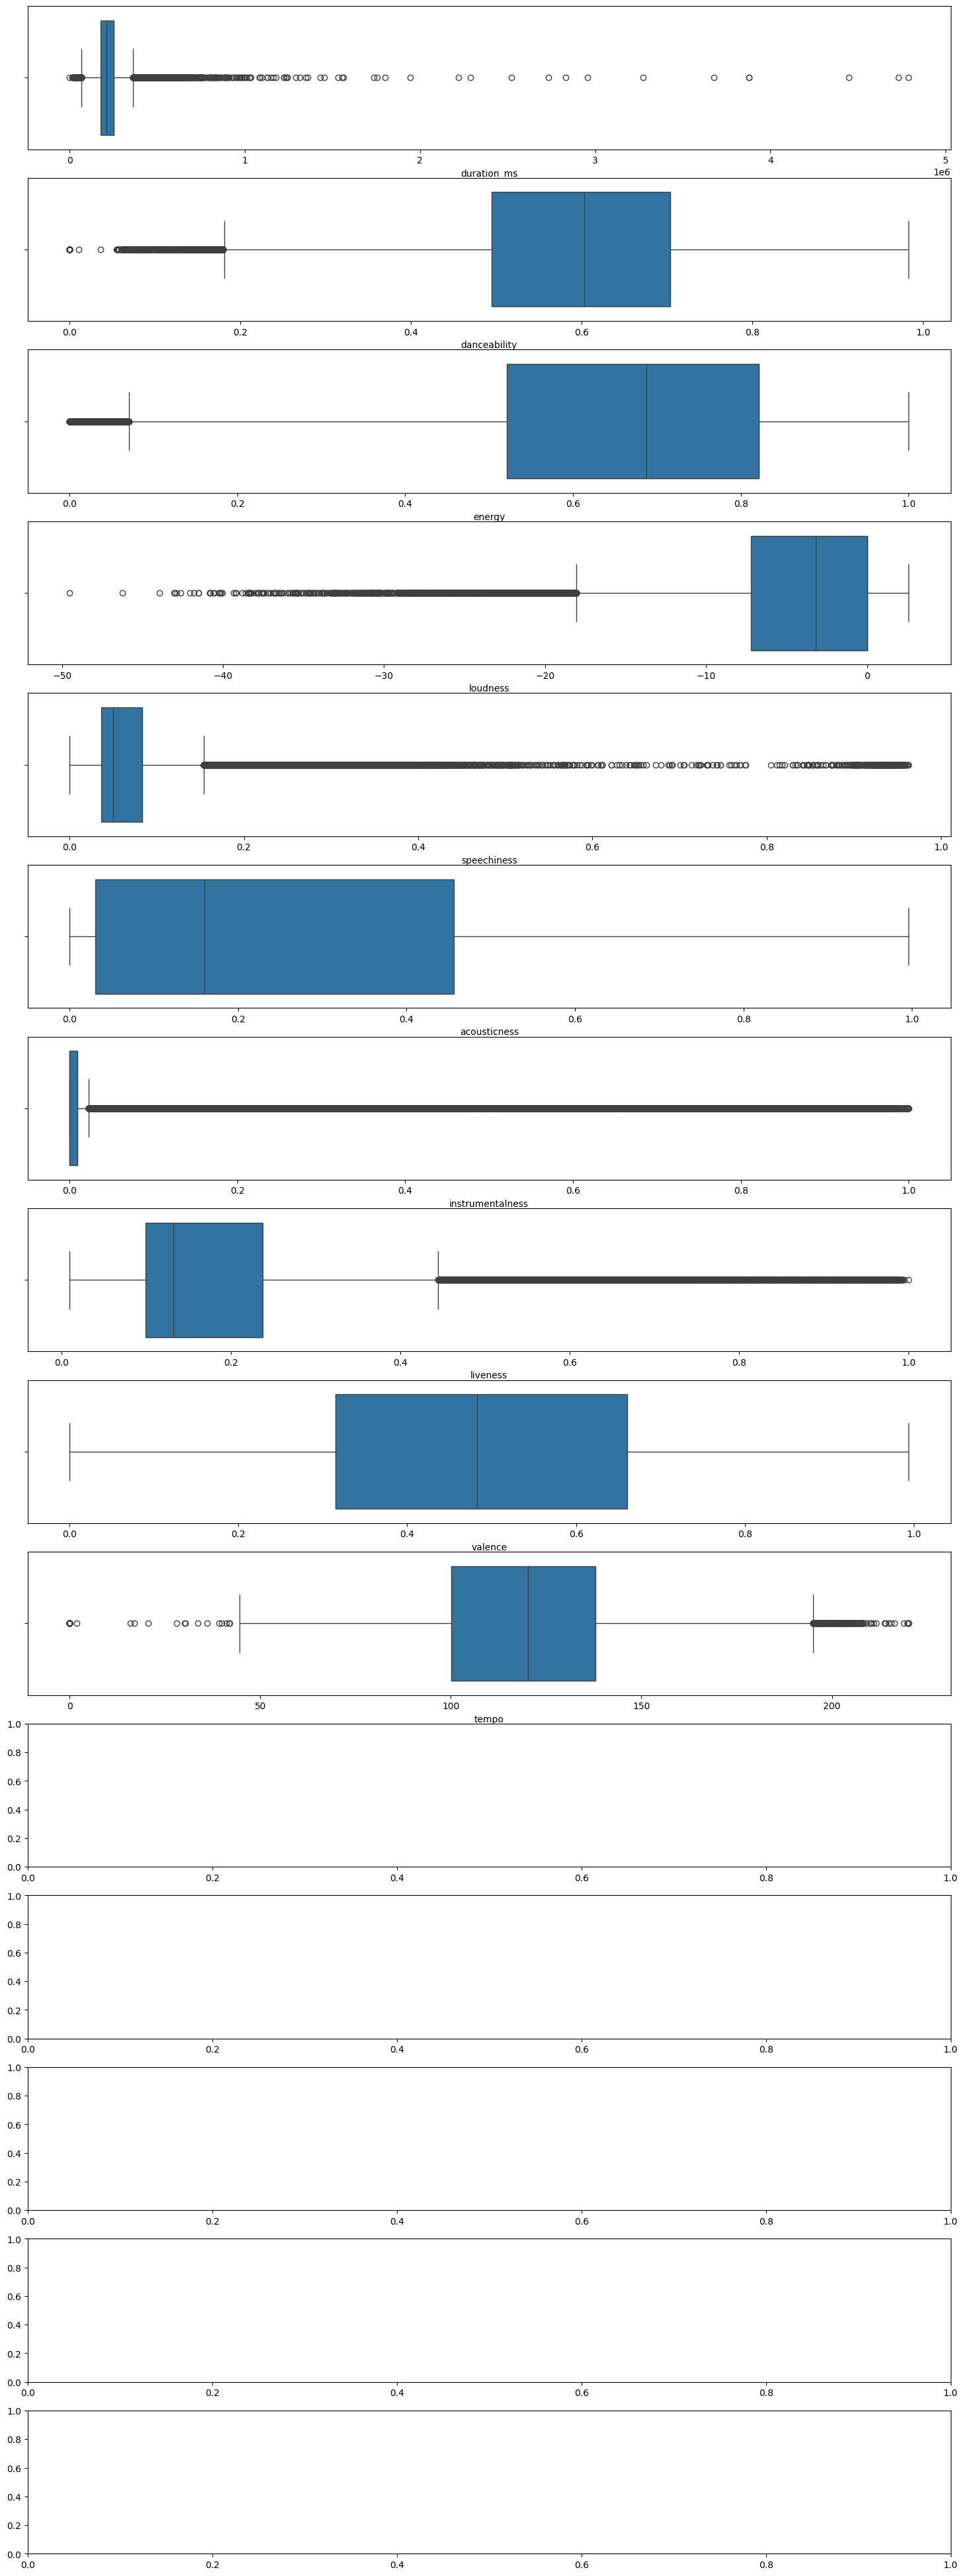

In [146]:
f, axes = plt.subplots(15, figsize=(18, 50))

count = 0
for var in X_train:
    sb.boxplot(data = X_train[var], orient = "h", ax = axes[count])
    count += 1

<Axes: >

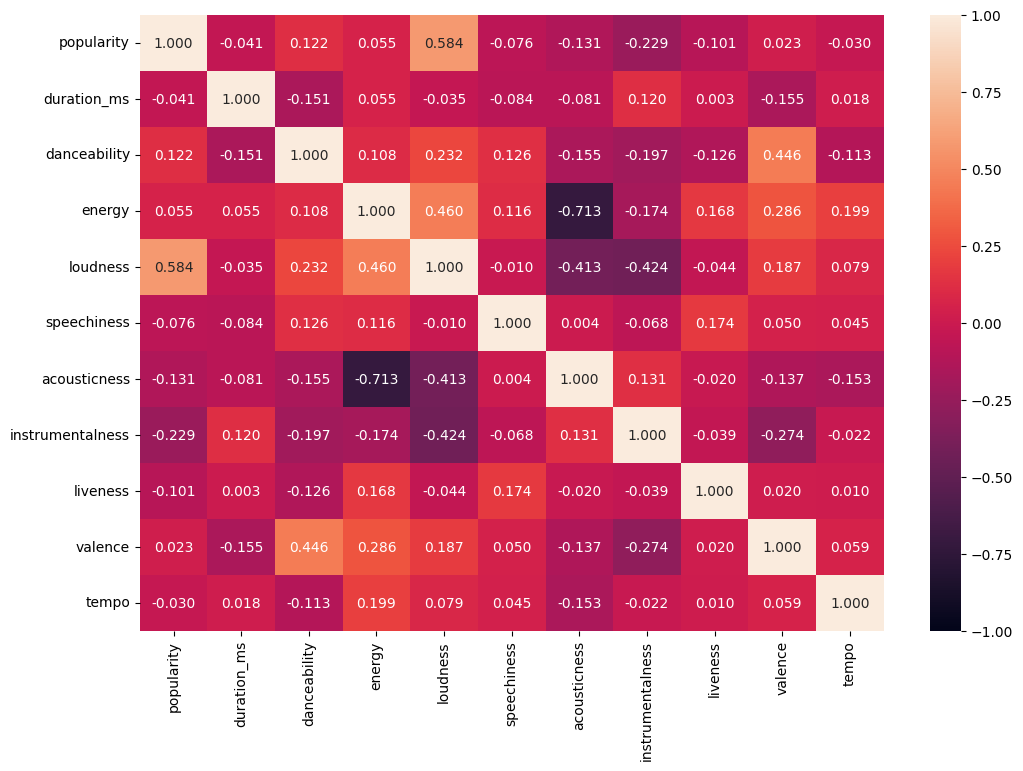

In [147]:
# Correlation between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".3f")

In [148]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the XGBoost regressor
xgb_regressor = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Train the model on the training data
xgb_regressor.fit(X_train, y_train)

# Predict on the testing data
y_pred = xgb_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

mse, rmse, r2

(317.02624760857327, 17.805230905792076, 0.6923720792787592)

# Gradient Boosting

In [149]:
smogn_clean_df

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,67.0,351413.0,0.437119,0.496777,0.000,0.038004,0.621056,0.055218,0.077442,0.329562,127.922188
1,68.0,351783.0,0.427469,0.615662,0.000,0.028970,0.348779,0.178368,0.102032,0.201814,92.113026
2,68.0,351661.0,0.509178,0.543150,0.000,0.027034,0.234267,0.110648,0.084248,0.328488,114.429474
3,67.0,351394.0,0.437674,0.490773,0.000,0.038458,0.635044,0.048935,0.076265,0.335983,129.716280
4,68.0,351567.0,0.572096,0.487288,0.000,0.025623,0.153533,0.057433,0.071576,0.424923,131.394058
...,...,...,...,...,...,...,...,...,...,...,...
106364,40.0,246306.0,0.470000,0.938000,-4.722,0.105000,0.000529,0.000000,0.251000,0.453000,128.002000
106365,38.0,312566.0,0.475000,0.860000,-4.722,0.042100,0.006500,0.000002,0.246000,0.427000,113.949000
106366,21.0,384999.0,0.172000,0.235000,-16.393,0.042200,0.640000,0.928000,0.086300,0.033900,125.995000
106367,41.0,283893.0,0.587000,0.506000,-10.889,0.029700,0.381000,0.000000,0.270000,0.413000,135.960000


In [150]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb

# Load the dataset



# Split data into features and target
X = smogn_clean_df.drop('popularity', axis=1)
y = smogn_clean_df['popularity']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the LightGBM Regressor
model = lgb.LGBMRegressor(random_state=42)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='mse')

# Predict on the test set
y_pred = model.predict(X_test, num_iteration=model.best_iteration_)

# Calculate MSE, RMSE, and R^2
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 85095, number of used features: 10
[LightGBM] [Info] Start training from score 58.057007
MSE: 367.20783755876425
RMSE: 19.162667809017726
R^2: 0.6391220023026045


# CatBoost

In [151]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor

# Assuming your data is loaded into a DataFrame 'data'

# Define features and target
X = smogn_clean_df.drop('popularity', axis=1)  # Features
y = smogn_clean_df['popularity']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the CatBoost regressor
cat_model = CatBoostRegressor(random_state=42, verbose=0)  # verbose=0 to keep the output clean

# Train the model
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

# Make predictions on the test set
y_pred = cat_model.predict(X_test)

# Compute the MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

# Print the results
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r_squared}')

MSE: 323.7315249583388
RMSE: 17.992540814413587
R^2: 0.6818488807451073


# H20 Gradient Boosting

In [152]:
# import h2o
# from h2o.estimators import H2OGradientBoostingEstimator
# from h2o.grid.grid_search import H2OGridSearch
# import pandas as pd

# # Initialize the H2O server
# h2o.init()

# # Load your data into H2O DataFrame
# data_path = 'data/data_smogn_05.csv'
# data = h2o.import_file(path=data_path)

# # Optionally, convert columns to factors if they are categorical
# # data['track_genre'] = data['track_genre'].asfactor()  # Uncomment if 'track_genre' is a categorical variable

# # Define features and target
# target = 'popularity'
# features = data.columns
# features.remove(target)
# features.remove('Unnamed: 0')  # Remove non-feature columns
# features.remove('track_id')

# # Split the data into training, validation, and testing sets
# train, valid, test = data.split_frame(ratios=[.7, .15], seed=42)

# # Initialize and train the H2O GBM model
# gbm = H2OGradientBoostingEstimator(seed=42)
# gbm.train(x=features, y=target, training_frame=train, validation_frame=valid)

# # Predict on the test set
# predictions = gbm.predict(test)

# # Calculate performance metrics
# performance = gbm.model_performance(test)

# # Print the performance metrics
# print(f'MSE: {performance.mse()}')
# print(f'RMSE: {performance.rmse()}')
# print(f'R^2: {performance.r2()}')


# TPOT

In [153]:
# import pandas as pd
# from tpot import TPOTRegressor
# from sklearn.model_selection import train_test_split



# # Assume 'popularity' is the target variable
# X = smogn_clean_df.drop('popularity', axis=1)
# y = smogn_clean_df['popularity']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create and train a TPOT regressor
# tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)
# tpot.fit(X_train, y_train)

# # Score the model on the test data
# print("The mean squared error of the best model is:", tpot.score(X_test, y_test))

# # Optionally, you can export the best model's pipeline to a Python file
# tpot.export('best_pipeline.py')



# Random Forest Regressor

In [155]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your data



# Assume 'popularity' is the target variable
X = smogn_clean_df.drop('popularity', axis=1)
y = smogn_clean_df['popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate MSE, RMSE, and R^2
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r_squared = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2 Score: {r_squared}')


Mean Squared Error (MSE): 202.4029728070288
Root Mean Squared Error (RMSE): 14.226839874231691
R^2 Score: 0.8010860006687306


# Gradient Boost Regressor

In [156]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score





# Assume 'popularity' is the target variable
X = smogn_clean_df.drop('popularity', axis=1)
y = smogn_clean_df['popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_regressor.predict(X_test)

# Calculate MSE, RMSE, and R^2
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r_squared = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2 Score: {r_squared}')


Mean Squared Error (MSE): 412.57917718229857
Root Mean Squared Error (RMSE): 20.312045125548007
R^2 Score: 0.5945327628543335


# Hist Gradient Boost

In [157]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Assume 'popularity' is the target variable
X = smogn_clean_df.drop('popularity', axis=1)
y = smogn_clean_df['popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the HistGradientBoostingRegressor
hgb_regressor = HistGradientBoostingRegressor(max_iter=100, random_state=42)
hgb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = hgb_regressor.predict(X_test)

# Calculate MSE, RMSE, and R^2
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r_squared = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2 Score: {r_squared}')


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Mean Squared Error (MSE): 372.1795583280685
Root Mean Squared Error (RMSE): 19.291955793233317
R^2 Score: 0.6342359828530608
